<ipython-input-1-6d097f47539c>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-1-6d097f47539c>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
<ipython-input-1-6d097f47539c>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-1-6d097f47539c>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

Epoch 1/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6425 - loss: 0.9304 - val_accuracy: 0.9164 - val_loss: 0.2325
Epoch 2/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8944 - loss: 0.2869 - val_accuracy: 0.9286 - val_loss: 0.2175
Epoch 3/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9289 - loss: 0.2012 - val_accuracy: 0.9361 - val_loss: 0.2349
Epoch 4/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9430 - loss: 0.1609 - val_accuracy: 0.9381 - val_loss: 0.1940
Epoch 5/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9505 - loss: 0.1382 - val_accuracy: 0.9300 - val_loss: 0.2604
Epoch 6/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9499 - loss: 0.1557 - val_accuracy: 0.9327 - val_loss: 0.3201
Epoch 7/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.9692 - loss: 0.0810 - val_accuracy: 0.9429 - val_loss: 0.1795
Epoch 8/20
184/184 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9695 - loss: 0.0899 - val_accuracy: 0

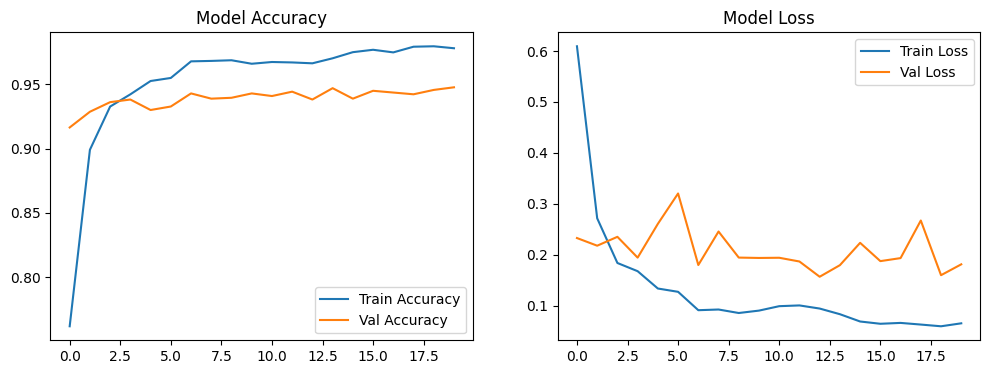

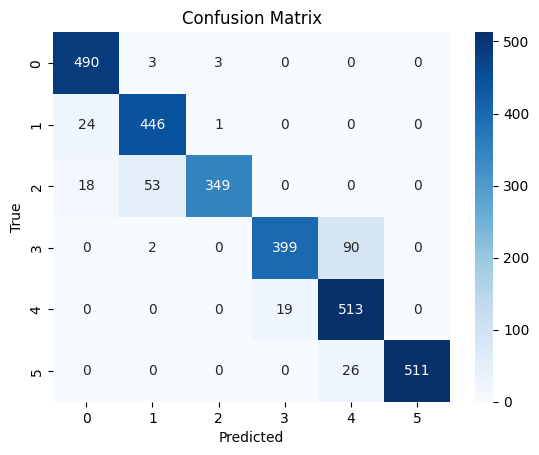

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
def load_data():
    X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
    X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
    y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
    y_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)
    return X_train, X_test, y_train, y_test

# Preprocessing the data
def preprocess_data(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

    return X_train, X_test, y_train, y_test

# Create different model architectures
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Conv1D(128, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(128),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Load and preprocess data
X_train, X_test, y_train, y_test = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

# Reshape data for LSTM and CNN (assuming time-steps of 1)
X_train_r = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_r = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Select a model
model_type = 'dense'  # Change to 'cnn' or 'lstm'

if model_type == 'dense':
    model = create_dense_model((X_train.shape[1],), y_train.shape[1])
elif model_type == 'cnn':
    model = create_cnn_model((X_train_r.shape[1], 1), y_train.shape[1])
elif model_type == 'lstm':
    model = create_lstm_model((X_train_r.shape[1], 1), y_train.shape[1])

# Train the model
history = model.fit(X_train_r if model_type != 'dense' else X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_r if model_type != 'dense' else X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


<ipython-input-3-c23c702bfe22>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-3-c23c702bfe22>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
<ipython-input-3-c23c702bfe22>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-3-c23c702bfe22>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 51s 266ms/step - accuracy: 0.7426 - loss: 2.9753 - val_accuracy: 0.9293 - val_loss: 0.3186
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 81s 262ms/step - accuracy: 0.9519 - loss: 0.1507 - val_accuracy: 0.9429 - val_loss: 0.1449
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 46s 251ms/step - accuracy: 0.9776 - loss: 0.0645 - val_accuracy: 0.9517 - val_loss: 0.1265
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 83s 256ms/step - accuracy: 0.9735 - loss: 0.0841 - val_accuracy: 0.9422 - val_loss: 0.1901
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 83s 260ms/step - accuracy: 0.9724 - loss: 0.0966 - val_accuracy: 0.9551 - val_loss: 0.1451
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95       496
           1       0.87      0.96      0.91       471
           2       0.99      0.82      0.90       420
           3       0.96      0.87      0.91       491
           4   

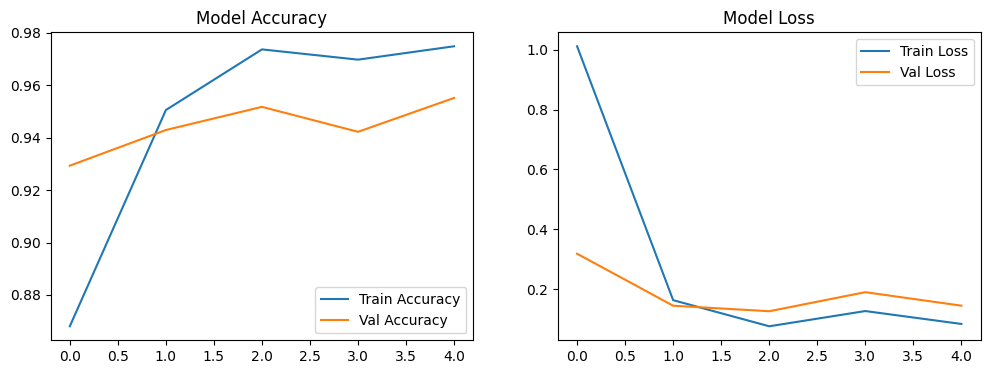

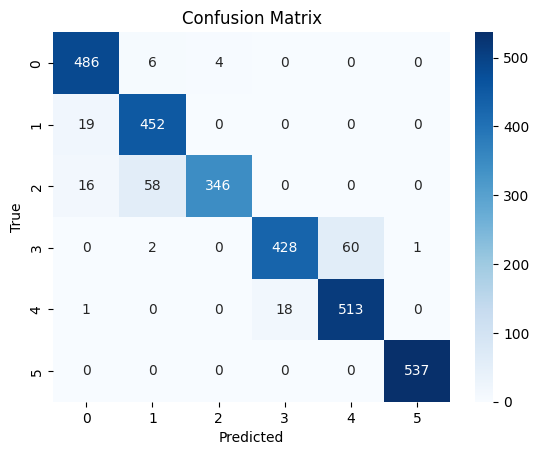

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
def load_data():
    X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
    X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
    y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
    y_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)
    return X_train, X_test, y_train, y_test

# Preprocessing the data
def preprocess_data(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

    return X_train, X_test, y_train, y_test

# Create different model architectures
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Conv1D(128, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(128),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Load and preprocess data
X_train, X_test, y_train, y_test = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

# Reshape data for LSTM and CNN (assuming time-steps of 1)
X_train_r = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_r = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Select a model
model_type = 'cnn'  # Change to 'cnn' or 'lstm'

if model_type == 'dense':
    model = create_dense_model((X_train.shape[1],), y_train.shape[1])
elif model_type == 'cnn':
    model = create_cnn_model((X_train_r.shape[1], 1), y_train.shape[1])
elif model_type == 'lstm':
    model = create_lstm_model((X_train_r.shape[1], 1), y_train.shape[1])

# Train the model
history = model.fit(X_train_r if model_type != 'dense' else X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_r if model_type != 'dense' else X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


<ipython-input-4-4cc173bdf0fc>:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-4-4cc173bdf0fc>:16: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
<ipython-input-4-4cc173bdf0fc>:17: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-4-4cc173bdf0fc>:18: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated an

Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.3656 - loss: 1.3096 - val_accuracy: 0.6526 - val_loss: 0.9586
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.5559 - loss: 0.9904 - val_accuracy: 0.6825 - val_loss: 0.8901
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.6806 - loss: 0.7356 - val_accuracy: 0.7988 - val_loss: 0.8647
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 202s 1s/step - accuracy: 0.7269 - loss: 0.6394 - val_accuracy: 0.7315 - val_loss: 0.9095
Epoch 5/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 200s 1s/step - accuracy: 0.7673 - loss: 0.5514 - val_accuracy: 0.7913 - val_loss: 0.8435
93/93 ━━━━━━━━━━━━━━━━━━━━ 29s 304ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.55      0.62       496
           1       0.73      0.71      0.72       471
           2       0.58      0.74      0.65       420
           3       0.86      0.70      0.77       491
           4       0.71

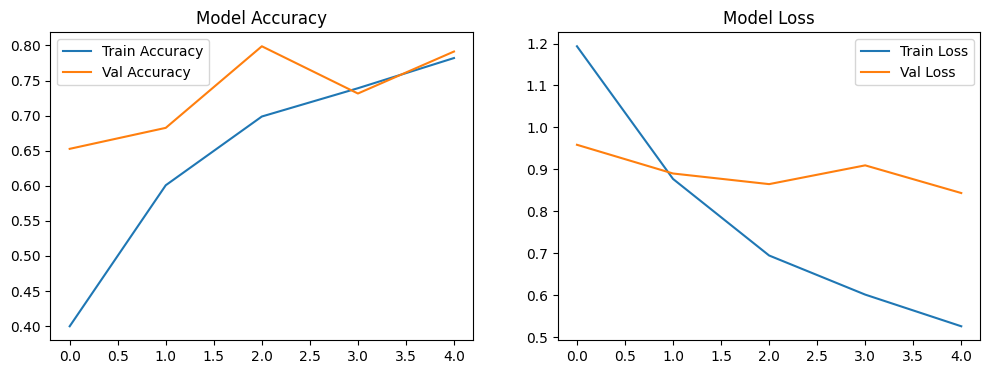

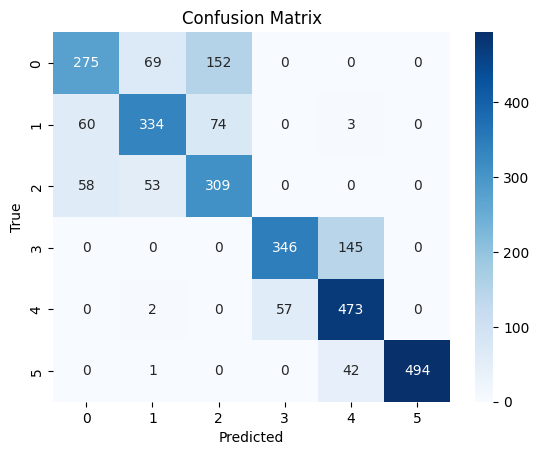

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, LSTM, Flatten, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
def load_data():
    X_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/X_train.txt", delim_whitespace=True, header=None)
    X_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/X_test.txt", delim_whitespace=True, header=None)
    y_train = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/train/y_train.txt", delim_whitespace=True, header=None)
    y_test = pd.read_csv("/content/drive/MyDrive/UCI HAR Dataset/test/y_test.txt", delim_whitespace=True, header=None)
    return X_train, X_test, y_train, y_test

# Preprocessing the data
def preprocess_data(X_train, X_test, y_train, y_test):
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    encoder = OneHotEncoder(sparse_output=False)
    y_train = encoder.fit_transform(y_train)
    y_test = encoder.transform(y_test)

    return X_train, X_test, y_train, y_test

# Create different model architectures
def create_dense_model(input_shape, num_classes):
    model = Sequential([
        Dense(512, activation='relu', input_shape=input_shape),
        Dropout(0.5),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_cnn_model(input_shape, num_classes):
    model = Sequential([
        Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dropout(0.5),
        Conv1D(128, kernel_size=3, activation='relu'),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

def create_lstm_model(input_shape, num_classes):
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=input_shape),
        LSTM(128),
        Dropout(0.5),
        Dense(128, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])
    model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Load and preprocess data
X_train, X_test, y_train, y_test = load_data()
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)

# Reshape data for LSTM and CNN (assuming time-steps of 1)
X_train_r = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_r = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Select a model
model_type = 'lstm'  # Change to 'cnn' or 'lstm'

if model_type == 'dense':
    model = create_dense_model((X_train.shape[1],), y_train.shape[1])
elif model_type == 'cnn':
    model = create_cnn_model((X_train_r.shape[1], 1), y_train.shape[1])
elif model_type == 'lstm':
    model = create_lstm_model((X_train_r.shape[1], 1), y_train.shape[1])

# Train the model
history = model.fit(X_train_r if model_type != 'dense' else X_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = np.argmax(model.predict(X_test_r if model_type != 'dense' else X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:\n", classification_report(y_true, y_pred))

# Plot accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Model Accuracy")

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")
plt.show()

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
